# 4 Classes CNN Pet Classifier. Pets used are Cats, Dogs, Horses and Zebras
# Accuracy on training data 99% and accuracy on testing data above 88%
# Classification reports, Confusion matrices and ROC curves with AUC values
# CNN Architecture: Total 24 layers, 1,207,588 Paramters, 1,206,628 Trainable and 960 Non-Trainable.

# 8 Conv2d, 8 Maxpooling, 4 BatchNormalization, 1 Flatten, 1 Droput and 2 Fully connected Dense layers.


In [11]:
################################################################################################################################
# Import tensorflow,  keras layers, matplotlib, seaborn, numpy, callbacks and other modules
################################################################################################################################

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D, Dropout, Input
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf 
import tqdm 
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
from tensorflow.keras.callbacks import Callback
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model


In [12]:
################################################################################################################################
# define train datagenerator with required augmentation and rescale
################################################################################################################################
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   featurewise_std_normalization=True,
                                   horizontal_flip = True)

In [13]:
################################################################################################################################
# define test datagenerator with just rescale and no augmentation
################################################################################################################################
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
################################################################################################################################
# load training inages with required target size, batch size and class_mode
################################################################################################################################
train = train_datagen.flow_from_directory('./datasets/trainset',
                                                 target_size = (256,256),
                                                 shuffle=True,
                                                 color_mode='rgb',
                                                 batch_size = 5,
                                                 class_mode = 'categorical')

Found 1000 images belonging to 4 classes.


In [15]:
################################################################################################################################
# load another copy of training images without augmentation for evaluating
################################################################################################################################
trainForTest = test_datagen.flow_from_directory('./datasets/trainset',                                     
                                        target_size = (256,256),
                                        color_mode='rgb',
                                        shuffle=False,
                                        batch_size = 5,
                                        class_mode = 'categorical')

Found 1000 images belonging to 4 classes.


In [16]:
################################################################################################################################
# load test images
################################################################################################################################
test = test_datagen.flow_from_directory('./datasets/testset',                                     
                                        target_size = (256,256),
                                        color_mode='rgb',
                                        shuffle=False,
                                        batch_size = 5,
                                        class_mode = 'categorical')

Found 200 images belonging to 4 classes.


In [17]:
################################################################################################################################
# load unseen new images also for evaluating
################################################################################################################################
NewData = test_datagen.flow_from_directory('./datasets/UnseenData',                                     
                                        target_size = (256,256),
                                        color_mode='rgb',
                                        shuffle=False,
                                        batch_size = 5,
                                        class_mode = 'categorical')

Found 80 images belonging to 4 classes.


In [18]:
################################################################################################################################
# look at the classes in either test or train file
################################################################################################################################
test.class_indices

{'cats': 0, 'dogs': 1, 'horses': 2, 'zebras': 3}

In [19]:
################################################################################################################################
# define cnn module with convolution, batchnormalization,pooling and dense layers
################################################################################################################################

def create_model():
    l12 = 0.00000001
    model = Sequential()
    model.add(Input(shape=(256, 256, 3)))
    
    model.add(Convolution2D(32, padding='same',kernel_size=(3, 3),strides=1,\
                            activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(l12)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2),strides=2))
    
    
    model.add(Convolution2D(32, padding='same',kernel_size=(3, 3),strides=1,\
                            activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(l12)))
    model.add(MaxPooling2D(pool_size = (2, 2),strides=2))
    
    
    model.add(Convolution2D(64, padding='same',kernel_size=(3, 3),strides=1,\
                            activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(l12)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2),strides=2))
    
    
    model.add(Convolution2D(64, padding='same',kernel_size=(3, 3),strides=1, \
                            activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(l12)))
    model.add(MaxPooling2D(pool_size = (2, 2),strides=2))
    
    
    model.add(Convolution2D(128, padding='same',kernel_size=(3, 3), strides=1, \
                            activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(l12)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2),strides=2))
    
    
    model.add(Convolution2D(128, padding='same',kernel_size=(3, 3), strides=1, \
                            activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(l12)))
    model.add(MaxPooling2D(pool_size = (2, 2),strides=2))
    
    
    model.add(Convolution2D(256, padding='same',kernel_size=(3, 3), strides=1, \
                            activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(l12)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2),strides=2))
    
    
    model.add(Convolution2D(256, padding='same',kernel_size=(3, 3), strides=1, \
                            activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l2(l12)))
    model.add(MaxPooling2D(pool_size = (2, 2),strides=2))
    
        
    model.add(Flatten())
    
    model.add(Dense(128, activation = tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(l12))) 
    model.add(Dropout(.2))
    

    model.add(Dense(4, activation = tf.nn.softmax))
    return model

In [20]:
################################################################################################################################
# create an instance of the above model
################################################################################################################################
model = create_model()

In [21]:
################################################################################################################################
# print the summary of the model to later compare / verify it with trained loaded model 
################################################################################################################################
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        2

In [22]:
################################################################################################################################
# define the filepath, checkpoint and callbacks
################################################################################################################################
FILEPATHA="./Weights/weights_Pet_classification_Model_4classes_val_TruePos_175.hdf5"

checkpointA = ModelCheckpoint(FILEPATHA, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

RLROP_PAT = 5
DECAY_DROP = 0.95

Reduce_lr_on_plat=ReduceLROnPlateau(monitor='val_accuracy',mode='max',patience=RLROP_PAT,factor=DECAY_DROP,\
                                    min_lr=1e-29,verbose=2 )

callbacks = [tqdm_callback, checkpointA, Reduce_lr_on_plat] 
 

In [23]:
################################################################################################################################
# load the trained model or weights
################################################################################################################################

#model = load_model(FILEPATHA)
model.load_weights('Weights\weights_Pet_classification_Model_4classes_val_TruePos_175 - Copy.hdf5')
#model.load_weights(FILEPATHA)

In [24]:
################################################################################################################################
# define metrics, loss, and optimixer to compile the model
################################################################################################################################
metric = tf.keras.metrics.TruePositives(name='accuracy')
model.compile(optimizer = Adam(lr=1e-6,  beta_1=0.9), loss = 'categorical_crossentropy', metrics = metric ) 

In [25]:
################################################################################################################################
# print the summary of the trained model to compare layers, parameters etc. with that of the initial instance of the model
################################################################################################################################
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        2

In [209]:
################################################################################################################################
# the below is the training code
################################################################################################################################
history=model.fit_generator(train,epochs=10,validation_data = test,verbose=0,shuffle=True,callbacks=callbacks)  


Training:   0%|                                                                               0/150 ETA: ?s,  …

Epoch 1/150


0/50                                                                                                         E…


Epoch 00001: val_accuracy did not improve from 173.00000
Epoch 2/150


0/50                                                                                                         E…


Epoch 00002: val_accuracy did not improve from 173.00000
Epoch 3/150


0/50                                                                                                         E…


Epoch 00003: val_accuracy did not improve from 173.00000
Epoch 4/150


0/50                                                                                                         E…


Epoch 00004: val_accuracy did not improve from 173.00000
Epoch 5/150


0/50                                                                                                         E…


Epoch 00005: val_accuracy did not improve from 173.00000
Epoch 6/150


0/50                                                                                                         E…


Epoch 00006: val_accuracy did not improve from 173.00000
Epoch 7/150


0/50                                                                                                         E…


Epoch 00007: val_accuracy did not improve from 173.00000
Epoch 8/150


0/50                                                                                                         E…


Epoch 00008: val_accuracy did not improve from 173.00000
Epoch 9/150


0/50                                                                                                         E…


Epoch 00009: val_accuracy did not improve from 173.00000
Epoch 10/150


0/50                                                                                                         E…


Epoch 00010: val_accuracy did not improve from 173.00000
Epoch 11/150


0/50                                                                                                         E…


Epoch 00011: val_accuracy did not improve from 173.00000
Epoch 12/150


0/50                                                                                                         E…


Epoch 00012: val_accuracy did not improve from 173.00000
Epoch 13/150


0/50                                                                                                         E…


Epoch 00013: val_accuracy did not improve from 173.00000
Epoch 14/150


0/50                                                                                                         E…


Epoch 00014: val_accuracy did not improve from 173.00000
Epoch 15/150


0/50                                                                                                         E…


Epoch 00015: val_accuracy did not improve from 173.00000
Epoch 16/150


0/50                                                                                                         E…


Epoch 00016: val_accuracy did not improve from 173.00000
Epoch 17/150


0/50                                                                                                         E…


Epoch 00017: val_accuracy did not improve from 173.00000
Epoch 18/150


0/50                                                                                                         E…


Epoch 00018: val_accuracy did not improve from 173.00000
Epoch 19/150


0/50                                                                                                         E…


Epoch 00019: val_accuracy did not improve from 173.00000
Epoch 20/150


0/50                                                                                                         E…


Epoch 00020: val_accuracy did not improve from 173.00000
Epoch 21/150


0/50                                                                                                         E…


Epoch 00021: val_accuracy did not improve from 173.00000
Epoch 22/150


0/50                                                                                                         E…


Epoch 00022: val_accuracy did not improve from 173.00000
Epoch 23/150


0/50                                                                                                         E…


Epoch 00023: val_accuracy did not improve from 173.00000
Epoch 24/150


0/50                                                                                                         E…


Epoch 00024: val_accuracy did not improve from 173.00000
Epoch 25/150


0/50                                                                                                         E…


Epoch 00025: val_accuracy did not improve from 173.00000
Epoch 26/150


0/50                                                                                                         E…


Epoch 00026: val_accuracy did not improve from 173.00000
Epoch 27/150


0/50                                                                                                         E…


Epoch 00027: val_accuracy did not improve from 173.00000
Epoch 28/150


0/50                                                                                                         E…


Epoch 00028: val_accuracy did not improve from 173.00000
Epoch 29/150


0/50                                                                                                         E…


Epoch 00029: val_accuracy did not improve from 173.00000
Epoch 30/150


0/50                                                                                                         E…


Epoch 00030: val_accuracy did not improve from 173.00000
Epoch 31/150


0/50                                                                                                         E…


Epoch 00031: val_accuracy did not improve from 173.00000
Epoch 32/150


0/50                                                                                                         E…


Epoch 00032: val_accuracy did not improve from 173.00000
Epoch 33/150


0/50                                                                                                         E…


Epoch 00033: val_accuracy did not improve from 173.00000
Epoch 34/150


0/50                                                                                                         E…


Epoch 00034: val_accuracy did not improve from 173.00000
Epoch 35/150


0/50                                                                                                         E…


Epoch 00035: val_accuracy did not improve from 173.00000
Epoch 36/150


0/50                                                                                                         E…


Epoch 00036: val_accuracy did not improve from 173.00000
Epoch 37/150


0/50                                                                                                         E…


Epoch 00037: val_accuracy did not improve from 173.00000
Epoch 38/150


0/50                                                                                                         E…


Epoch 00038: val_accuracy did not improve from 173.00000
Epoch 39/150


0/50                                                                                                         E…


Epoch 00039: val_accuracy did not improve from 173.00000
Epoch 40/150


0/50                                                                                                         E…


Epoch 00040: val_accuracy did not improve from 173.00000
Epoch 41/150


0/50                                                                                                         E…


Epoch 00041: val_accuracy did not improve from 173.00000
Epoch 42/150


0/50                                                                                                         E…


Epoch 00042: val_accuracy did not improve from 173.00000
Epoch 43/150


0/50                                                                                                         E…


Epoch 00043: val_accuracy did not improve from 173.00000
Epoch 44/150


0/50                                                                                                         E…


Epoch 00044: val_accuracy did not improve from 173.00000
Epoch 45/150


0/50                                                                                                         E…


Epoch 00045: val_accuracy did not improve from 173.00000
Epoch 46/150


0/50                                                                                                         E…


Epoch 00046: val_accuracy did not improve from 173.00000
Epoch 47/150


0/50                                                                                                         E…


Epoch 00047: val_accuracy did not improve from 173.00000
Epoch 48/150


0/50                                                                                                         E…


Epoch 00048: val_accuracy did not improve from 173.00000
Epoch 49/150


0/50                                                                                                         E…


Epoch 00049: val_accuracy did not improve from 173.00000
Epoch 50/150


0/50                                                                                                         E…


Epoch 00050: val_accuracy improved from 173.00000 to 174.00000, saving model to ./Weights\weights_Pet_classification_Model_4classes_val_TruePos_175.hdf5
Epoch 51/150


0/50                                                                                                         E…


Epoch 00051: val_accuracy did not improve from 174.00000
Epoch 52/150


0/50                                                                                                         E…


Epoch 00052: val_accuracy did not improve from 174.00000
Epoch 53/150


0/50                                                                                                         E…


Epoch 00053: val_accuracy did not improve from 174.00000
Epoch 54/150


0/50                                                                                                         E…


Epoch 00054: val_accuracy did not improve from 174.00000
Epoch 55/150


0/50                                                                                                         E…


Epoch 00055: val_accuracy did not improve from 174.00000
Epoch 56/150


0/50                                                                                                         E…


Epoch 00056: val_accuracy did not improve from 174.00000
Epoch 57/150


0/50                                                                                                         E…


Epoch 00057: val_accuracy did not improve from 174.00000
Epoch 58/150


0/50                                                                                                         E…


Epoch 00058: val_accuracy did not improve from 174.00000
Epoch 59/150


0/50                                                                                                         E…


Epoch 00059: val_accuracy did not improve from 174.00000
Epoch 60/150


0/50                                                                                                         E…


Epoch 00060: val_accuracy did not improve from 174.00000
Epoch 61/150


0/50                                                                                                         E…


Epoch 00061: val_accuracy did not improve from 174.00000
Epoch 62/150


0/50                                                                                                         E…


Epoch 00062: val_accuracy did not improve from 174.00000
Epoch 63/150


0/50                                                                                                         E…


Epoch 00063: val_accuracy did not improve from 174.00000
Epoch 64/150


0/50                                                                                                         E…


Epoch 00064: val_accuracy did not improve from 174.00000
Epoch 65/150


0/50                                                                                                         E…


Epoch 00065: val_accuracy did not improve from 174.00000
Epoch 66/150


0/50                                                                                                         E…


Epoch 00066: val_accuracy did not improve from 174.00000
Epoch 67/150


0/50                                                                                                         E…


Epoch 00067: val_accuracy did not improve from 174.00000
Epoch 68/150


0/50                                                                                                         E…


Epoch 00068: val_accuracy did not improve from 174.00000
Epoch 69/150


0/50                                                                                                         E…


Epoch 00069: val_accuracy did not improve from 174.00000
Epoch 70/150


0/50                                                                                                         E…


Epoch 00070: val_accuracy did not improve from 174.00000
Epoch 71/150


0/50                                                                                                         E…


Epoch 00071: val_accuracy did not improve from 174.00000
Epoch 72/150


0/50                                                                                                         E…


Epoch 00072: val_accuracy did not improve from 174.00000
Epoch 73/150


0/50                                                                                                         E…


Epoch 00073: val_accuracy did not improve from 174.00000
Epoch 74/150


0/50                                                                                                         E…


Epoch 00074: val_accuracy did not improve from 174.00000
Epoch 75/150


0/50                                                                                                         E…


Epoch 00075: val_accuracy did not improve from 174.00000
Epoch 76/150


0/50                                                                                                         E…


Epoch 00076: val_accuracy did not improve from 174.00000
Epoch 77/150


0/50                                                                                                         E…


Epoch 00077: val_accuracy did not improve from 174.00000
Epoch 78/150


0/50                                                                                                         E…


Epoch 00078: val_accuracy did not improve from 174.00000
Epoch 79/150


0/50                                                                                                         E…


Epoch 00079: val_accuracy did not improve from 174.00000
Epoch 80/150


0/50                                                                                                         E…


Epoch 00080: val_accuracy did not improve from 174.00000
Epoch 81/150


0/50                                                                                                         E…


Epoch 00081: val_accuracy did not improve from 174.00000
Epoch 82/150


0/50                                                                                                         E…


Epoch 00082: val_accuracy did not improve from 174.00000
Epoch 83/150


0/50                                                                                                         E…


Epoch 00083: val_accuracy did not improve from 174.00000
Epoch 84/150


0/50                                                                                                         E…


Epoch 00084: val_accuracy did not improve from 174.00000
Epoch 85/150


0/50                                                                                                         E…


Epoch 00085: val_accuracy did not improve from 174.00000
Epoch 86/150


0/50                                                                                                         E…


Epoch 00086: val_accuracy did not improve from 174.00000
Epoch 87/150


0/50                                                                                                         E…


Epoch 00087: val_accuracy did not improve from 174.00000
Epoch 88/150


0/50                                                                                                         E…


Epoch 00088: val_accuracy did not improve from 174.00000
Epoch 89/150


0/50                                                                                                         E…


Epoch 00089: val_accuracy did not improve from 174.00000
Epoch 90/150


0/50                                                                                                         E…


Epoch 00090: val_accuracy did not improve from 174.00000
Epoch 91/150


0/50                                                                                                         E…


Epoch 00091: val_accuracy did not improve from 174.00000
Epoch 92/150


0/50                                                                                                         E…


Epoch 00092: val_accuracy did not improve from 174.00000
Epoch 93/150


0/50                                                                                                         E…


Epoch 00093: val_accuracy did not improve from 174.00000
Epoch 94/150


0/50                                                                                                         E…


Epoch 00094: val_accuracy did not improve from 174.00000
Epoch 95/150


0/50                                                                                                         E…


Epoch 00095: val_accuracy did not improve from 174.00000
Epoch 96/150


0/50                                                                                                         E…


Epoch 00096: val_accuracy did not improve from 174.00000
Epoch 97/150


0/50                                                                                                         E…


Epoch 00097: val_accuracy did not improve from 174.00000
Epoch 98/150


0/50                                                                                                         E…


Epoch 00098: val_accuracy did not improve from 174.00000
Epoch 99/150


0/50                                                                                                         E…


Epoch 00099: val_accuracy did not improve from 174.00000
Epoch 100/150


0/50                                                                                                         E…


Epoch 00100: val_accuracy did not improve from 174.00000
Epoch 101/150


0/50                                                                                                         E…


Epoch 00101: val_accuracy did not improve from 174.00000
Epoch 102/150


0/50                                                                                                         E…


Epoch 00102: val_accuracy did not improve from 174.00000
Epoch 103/150


0/50                                                                                                         E…


Epoch 00103: val_accuracy did not improve from 174.00000
Epoch 104/150


0/50                                                                                                         E…


Epoch 00104: val_accuracy did not improve from 174.00000
Epoch 105/150


0/50                                                                                                         E…


Epoch 00105: val_accuracy did not improve from 174.00000
Epoch 106/150


0/50                                                                                                         E…


Epoch 00106: val_accuracy did not improve from 174.00000
Epoch 107/150


0/50                                                                                                         E…


Epoch 00107: val_accuracy did not improve from 174.00000
Epoch 108/150


0/50                                                                                                         E…


Epoch 00108: val_accuracy did not improve from 174.00000
Epoch 109/150


0/50                                                                                                         E…


Epoch 00109: val_accuracy did not improve from 174.00000
Epoch 110/150


0/50                                                                                                         E…


Epoch 00110: val_accuracy did not improve from 174.00000
Epoch 111/150


0/50                                                                                                         E…


Epoch 00111: val_accuracy did not improve from 174.00000
Epoch 112/150


0/50                                                                                                         E…


Epoch 00112: val_accuracy did not improve from 174.00000
Epoch 113/150


0/50                                                                                                         E…


Epoch 00113: val_accuracy did not improve from 174.00000
Epoch 114/150


0/50                                                                                                         E…


Epoch 00114: val_accuracy did not improve from 174.00000
Epoch 115/150


0/50                                                                                                         E…


Epoch 00115: val_accuracy did not improve from 174.00000
Epoch 116/150


0/50                                                                                                         E…


Epoch 00116: val_accuracy did not improve from 174.00000
Epoch 117/150


0/50                                                                                                         E…


Epoch 00117: val_accuracy did not improve from 174.00000
Epoch 118/150


0/50                                                                                                         E…


Epoch 00118: val_accuracy did not improve from 174.00000
Epoch 119/150


0/50                                                                                                         E…


Epoch 00119: val_accuracy did not improve from 174.00000
Epoch 120/150


0/50                                                                                                         E…


Epoch 00120: val_accuracy did not improve from 174.00000
Epoch 121/150


0/50                                                                                                         E…


Epoch 00121: val_accuracy did not improve from 174.00000
Epoch 122/150


0/50                                                                                                         E…


Epoch 00122: val_accuracy did not improve from 174.00000
Epoch 123/150


0/50                                                                                                         E…


Epoch 00123: val_accuracy did not improve from 174.00000
Epoch 124/150


0/50                                                                                                         E…


Epoch 00124: val_accuracy did not improve from 174.00000
Epoch 125/150


0/50                                                                                                         E…


Epoch 00125: val_accuracy did not improve from 174.00000
Epoch 126/150


0/50                                                                                                         E…


Epoch 00126: val_accuracy did not improve from 174.00000
Epoch 127/150


0/50                                                                                                         E…


Epoch 00127: val_accuracy did not improve from 174.00000
Epoch 128/150


0/50                                                                                                         E…


Epoch 00128: val_accuracy did not improve from 174.00000
Epoch 129/150


0/50                                                                                                         E…


Epoch 00129: val_accuracy did not improve from 174.00000
Epoch 130/150


0/50                                                                                                         E…


Epoch 00130: val_accuracy did not improve from 174.00000
Epoch 131/150


0/50                                                                                                         E…

KeyboardInterrupt: 

In [26]:
################################################################################################################################
# evaluate the loaded trained model with training and testing datasets
################################################################################################################################
train_loss, train_acc = model.evaluate(train, callbacks=[tqdm_callback],batch_size=20, verbose=0)
test_loss, test_acc = model.evaluate(test, callbacks=[tqdm_callback], batch_size=20, verbose=0)
print('Train Accu: %.3f, Test Accu: %.3f' % (train_acc, test_acc))
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

0/200                                                                                              ETA: ?s - E…

200/200 [==============================] - 77s 372ms/step - loss: 0.0376 - accuracy: 497.1095


0/40                                                                                               ETA: ?s - E…

40/40 [==============================] - 10s 233ms/step - loss: 0.6421 - accuracy: 175.0000
Train Accu: 986.000, Test Accu: 175.000
Train Loss: 0.038, Test Loss: 0.642


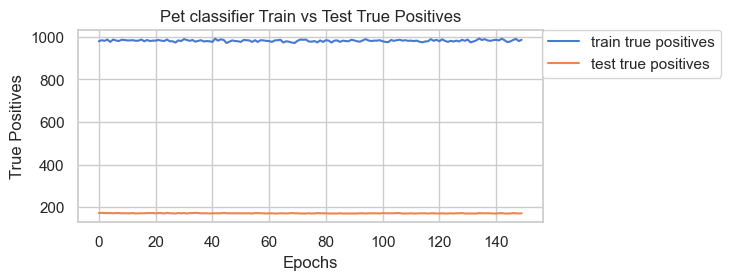

In [212]:
################################################################################################################################
# the below code is for plotting the accuracy curve of training and testing captured while training
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2.5))
plt.plot(history.history['accuracy'], label='train true positives')
plt.plot(history.history['val_accuracy'], label='test true positives')
plt.grid(True)
plt.title('Pet classifier Train vs Test True Positives')
plt.xlabel('Epochs')
plt.ylabel('True Positives')

plt.legend(bbox_to_anchor=(0.9, .54, 0.5, 0.5))
plt.show()

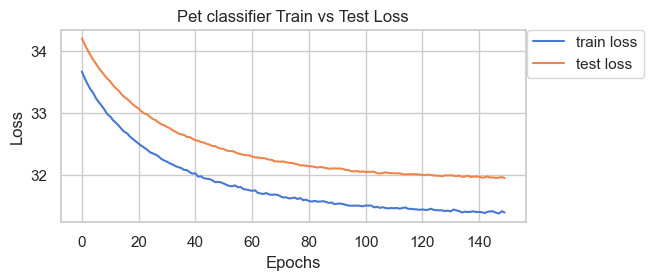

In [213]:
################################################################################################################################
# the below code is for plotting the loss curve of training and testing captured while training 
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2.5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Pet classifier Train vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(bbox_to_anchor=(0.77, .54, 0.5, 0.5))
plt.show()

In [27]:
################################################################################################################################
# define a funtion to decode the predictions fromm the model and plot the image sent for prediction
################################################################################################################################
def predict_image(imga,modela):
    imga = imga
    model = modela
    test_image = image.load_img(imga,target_size=(256,256))
    img = image.load_img(imga,target_size=(256,256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis=0)
    result = model.predict(test_image)
    plt.figure(figsize=(2,2))
    result1 = np.argmax(result)
    if result1 ==0:
        prediction= 'cat'
    elif result1 ==1:
        prediction = 'dog'
    elif result1 ==2:
        prediction = 'horse'
    else:
        prediction = 'zebra'
    print(prediction.center(20))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


        cat         


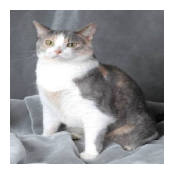

In [28]:
################################################################################################################################
# pass a cat image and see wht the predictions would be
################################################################################################################################

predict_image('./datasets/cat.jpg',model)

        dog         


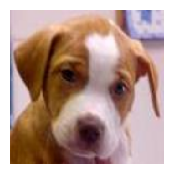

In [29]:
################################################################################################################################
# pass a dogs image and see what the prediction would be
################################################################################################################################

predict_image('./datasets/dog.jpg',model)

       horse        


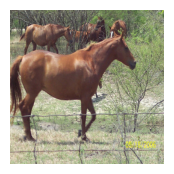

In [30]:
################################################################################################################################
# pass a horse image and see what the prediction would be
################################################################################################################################

predict_image('./datasets/horse.jpg',model)

       zebra        


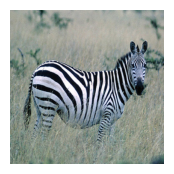

In [31]:
################################################################################################################################
# pass a zebar image and see what the prediction would be
################################################################################################################################

predict_image('./datasets/zebra.jpg',model)

# Evaluating using training dataset images

In [32]:
################################################################################################################################
# first predict on the training set images 
################################################################################################################################
pred=model.predict(trainForTest)
pred1 = np.argmax(pred,axis=1)


In [33]:
################################################################################################################################
# print the classification report of the training set iamges
################################################################################################################################
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
print('Train Data Classification Report'.center(60))
print('-------------------------------------'.center(60))
print(classification_report(trainForTest.classes, pred1,target_names=['Cats','Dogs','Horses','Zebras']))

              Train Data Classification Report              
           -------------------------------------            
              precision    recall  f1-score   support

        Cats       1.00      0.98      0.99       250
        Dogs       0.98      1.00      0.99       250
      Horses       1.00      1.00      1.00       250
      Zebras       1.00      1.00      1.00       250

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [34]:
################################################################################################################################
# print the confusion matrix of the training set images
################################################################################################################################
train_cnfu_matrix = confusion_matrix(trainForTest.classes, pred1)
labels = ['Cats', 'Dogs', 'Horses', 'Zebras']
train_df_cm  = pd.DataFrame(train_cnfu_matrix,  index=labels, columns=labels)
print('Confusion Matrix of Training Data'.center(40))
print('-----------------------------------------------'.center(40))
print(train_df_cm)

   Confusion Matrix of Training Data    
-----------------------------------------------
        Cats  Dogs  Horses  Zebras
Cats     245     3       1       1
Dogs       0   250       0       0
Horses     0     0     250       0
Zebras     0     1       0     249


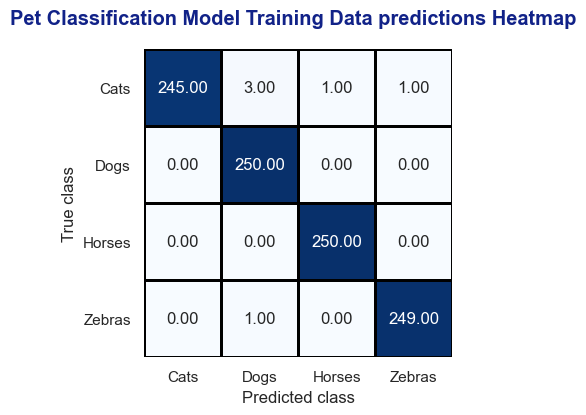

In [35]:
################################################################################################################################
# plot the confusion matrix of training set predictions using seaborn heatmap 
################################################################################################################################
plt.figure(figsize=(4,4))
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
sns.heatmap(train_df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Blues,\
            cbar=False)
plt.suptitle('Pet Classification Model Training Data predictions Heatmap',color='#112288',\
                                  fontweight='bold')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()  


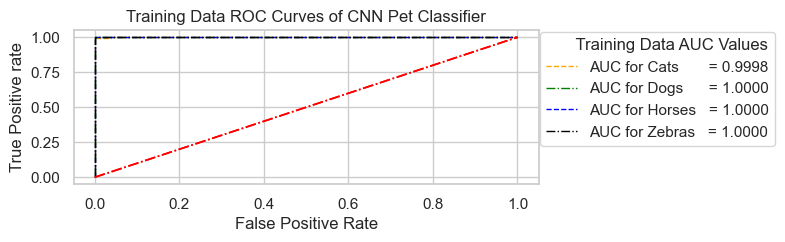

In [37]:
################################################################################################################################
# plot the roc_curve and print the AUC values in it for all the 4 classes
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
train_onehot =  tf.keras.utils.to_categorical(trainForTest.classes, num_classes=4)

num_classes = 4
fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

i = 0
while i < num_classes:
    fpr[i], tpr[i], thresh[i] = roc_curve(train_onehot[:,i], pred[:,i])       
    i+=1

i = 0
while i < num_classes:
    roc_auc[i] = auc(fpr[i], tpr[i])
    i+=1
    

plt.figure(figsize=(6,2))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',lw=1, label='AUC for Cats       = %0.4f'% roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-.',color='green', lw=1, label='AUC for Dogs      = %0.4f'% roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue',  lw=1, label='AUC for Horses   = %0.4f'% roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='-.',color='black', lw=1, label='AUC for Zebras   = %0.4f'% roc_auc[3])
plt.plot([(0,0),(1,1)],linestyle='-.',color='red',lw=1.2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title("Training Data ROC Curves of CNN Pet Classifier") 
plt.grid(True)
plt.legend(title='      Training Data AUC Values', bbox_to_anchor=(1.025, .54, 0.5, 0.5))
plt.show()


# Evaluating using testing/validation dataset images

In [38]:
################################################################################################################################
# now predict the model on testing set of images and also print the predictions
################################################################################################################################
pred=model.predict(test)
pred1 = np.argmax(pred,axis=1)
pred1 

array([1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [39]:
################################################################################################################################
# to compare with the above prediction results print the testing classes values
################################################################################################################################
test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [40]:
################################################################################################################################
# print the classification report of the testing data results
################################################################################################################################
print('Validation Data Classification Report'.center(60))
print('-------------------------------------'.center(60))
print(classification_report(test.classes, pred1,target_names=['Cats','Dogs','Horses','Zebras']))

           Validation Data Classification Report            
           -------------------------------------            
              precision    recall  f1-score   support

        Cats       0.84      0.86      0.85        50
        Dogs       0.80      0.74      0.77        50
      Horses       0.87      0.94      0.90        50
      Zebras       0.98      0.96      0.97        50

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.87      0.88      0.87       200



In [41]:
################################################################################################################################
# print the confusion matrix of the testing dataset results
################################################################################################################################
test_cnfu_matrix = confusion_matrix(test.classes, pred1)
labels = ['Cats', 'Dogs', 'Horses', 'Zebras']
test_df_cm  = pd.DataFrame(test_cnfu_matrix,  index=labels, columns=labels)
print('Confusion Matrix of Validation Data'.center(40))
print('-----------------------------------------------'.center(40))
print(test_df_cm)

  Confusion Matrix of Validation Data   
-----------------------------------------------
        Cats  Dogs  Horses  Zebras
Cats      43     6       1       0
Dogs       8    37       4       1
Horses     0     3      47       0
Zebras     0     0       2      48


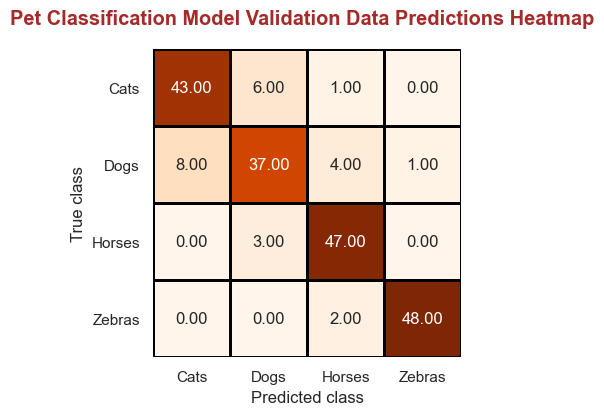

In [42]:
################################################################################################################################
# plot the confusion matrix of testing predictions  
################################################################################################################################
plt.figure(figsize=(4,4))
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
sns.heatmap(test_df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Oranges,\
            cbar=False)
plt.suptitle('Pet Classification Model Validation Data Predictions Heatmap',color='brown',fontweight='bold')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()  


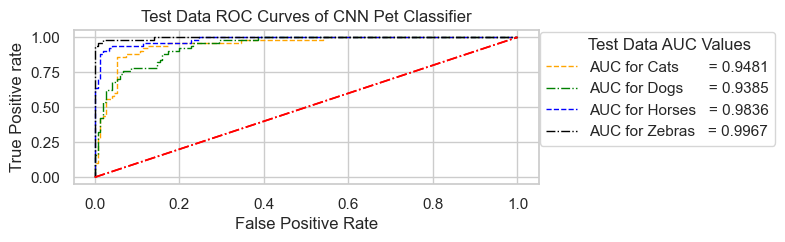

In [43]:
################################################################################################################################
# plot the roc_curve and print the AUC values in it for all the 4 classes 
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
test_onehot =  tf.keras.utils.to_categorical(test.classes, num_classes=4)
num_classes = 4
fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

i = 0
while i < num_classes:
    fpr[i], tpr[i], thresh[i] = roc_curve(test_onehot[:,i], pred[:,i])       
    i+=1

i = 0
while i < num_classes:
    roc_auc[i] = auc(fpr[i], tpr[i])
    i+=1
    

plt.figure(figsize=(6,2))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',lw=1, label='AUC for Cats       = %0.4f'% roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-.',color='green', lw=1, label='AUC for Dogs      = %0.4f'% roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue',  lw=1, label='AUC for Horses   = %0.4f'% roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='-.',color='black', lw=1, label='AUC for Zebras   = %0.4f'% roc_auc[3])
plt.plot([(0,0),(1,1)],linestyle='-.',color='red',lw=1.2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title("Test Data ROC Curves of CNN Pet Classifier") 
plt.grid(True)
plt.legend(title='     Test Data AUC Values', bbox_to_anchor=(1.025, .54, 0.5, 0.5))
plt.show()



# Evaluating using new images unseen  by model   

In [44]:
################################################################################################################################
# now predict using new/unseen dataset separate from training and testing/validation images 
################################################################################################################################
predND = model.predict(NewData)
predND1=np.argmax(predND,axis=1)

In [45]:
################################################################################################################################
# Print the classification report of the new unseen dataset images
################################################################################################################################

print('Unseeen Data Classification Report'.center(60))
print('-------------------------------------'.center(60))
print(classification_report(NewData.classes, predND1,target_names=['Cats','Dogs','Horses','Zebras']))

             Unseeen Data Classification Report             
           -------------------------------------            
              precision    recall  f1-score   support

        Cats       0.84      0.80      0.82        20
        Dogs       0.88      0.75      0.81        20
      Horses       0.87      1.00      0.93        20
      Zebras       0.90      0.95      0.93        20

    accuracy                           0.88        80
   macro avg       0.87      0.88      0.87        80
weighted avg       0.87      0.88      0.87        80



In [46]:
################################################################################################################################
# print the confusion matrix of the new unseen iamges
################################################################################################################################
ND_cnfu_matrix = confusion_matrix(NewData.classes, predND1)
labels = ['Cats', 'Dogs', 'Horses', 'Zebras']
ND_df_cm  = pd.DataFrame(ND_cnfu_matrix,  index=labels, columns=labels)
print('Confusion Matrix of Unseen Data'.center(40))
print('-----------------------------------------------'.center(40))
print(ND_df_cm)

    Confusion Matrix of Unseen Data     
-----------------------------------------------
        Cats  Dogs  Horses  Zebras
Cats      16     2       1       1
Dogs       3    15       1       1
Horses     0     0      20       0
Zebras     0     0       1      19


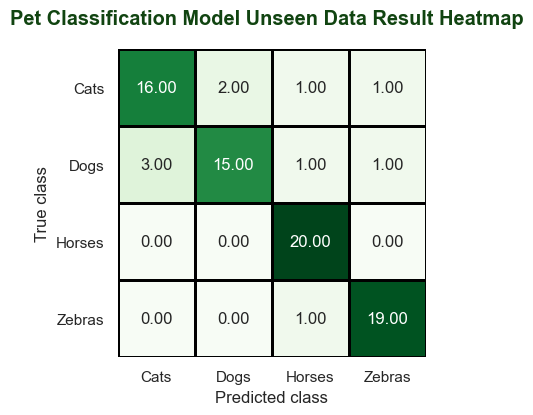

In [47]:
################################################################################################################################
# plot the confusion matrix of new unseen data predictions  
################################################################################################################################
plt.figure(figsize=(4,4))
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
sns.heatmap(ND_df_cm,annot=True,fmt='.2f',linewidths=2,linecolor='black',square=True,cmap=plt.cm.Greens,\
            cbar=False)
plt.suptitle('Pet Classification Model Unseen Data Result Heatmap', color='#114411',fontweight='bold')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.yticks(rotation=0)
plt.show()  


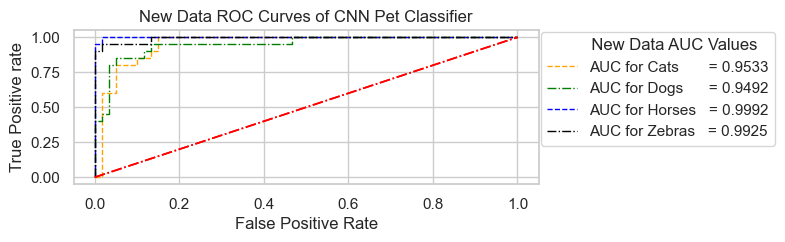

In [48]:
################################################################################################################################
# plot the roc_curve and print the AUC values in it for all the 4 classes.
################################################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
NewData_onehot =  tf.keras.utils.to_categorical(NewData.classes, num_classes=4)

num_classes = 4
fpr = {}
tpr = {}
thresh = {}
roc_auc = {}

i = 0
while i < num_classes:
    fpr[i], tpr[i], thresh[i] = roc_curve(NewData_onehot[:,i], predND[:,i])       
    i+=1

i = 0
while i < num_classes:
    roc_auc[i] = auc(fpr[i], tpr[i])
    i+=1
    

plt.figure(figsize=(6,2))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange',lw=1, label='AUC for Cats       = %0.4f'% roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-.',color='green', lw=1, label='AUC for Dogs      = %0.4f'% roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue',  lw=1, label='AUC for Horses   = %0.4f'% roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='-.',color='black', lw=1, label='AUC for Zebras   = %0.4f'% roc_auc[3])
plt.plot([(0,0),(1,1)],linestyle='-.',color='red',lw=1.2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title("New Data ROC Curves of CNN Pet Classifier") 
plt.grid(True)
plt.legend(title='       New Data AUC Values', bbox_to_anchor=(1.025, .54, 0.5, 0.5))
plt.show()


# Training accuracy 99% and testing accuracy 88% 

# Plotting images used for evaluating 

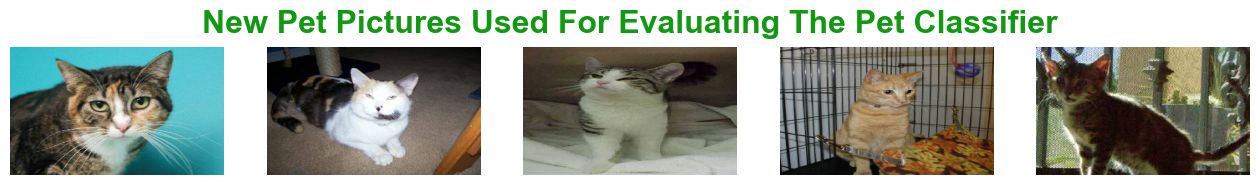

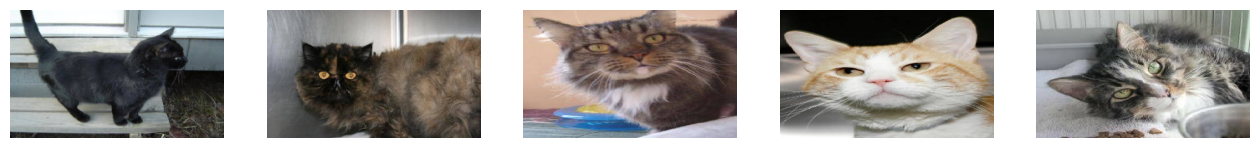

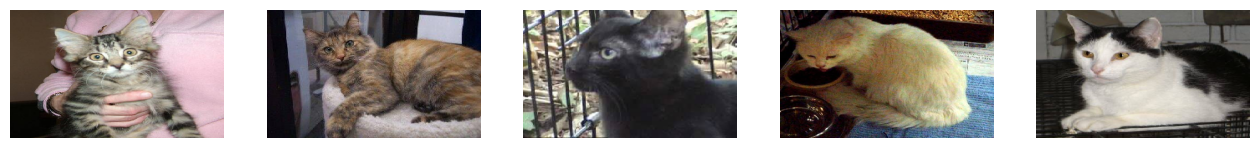

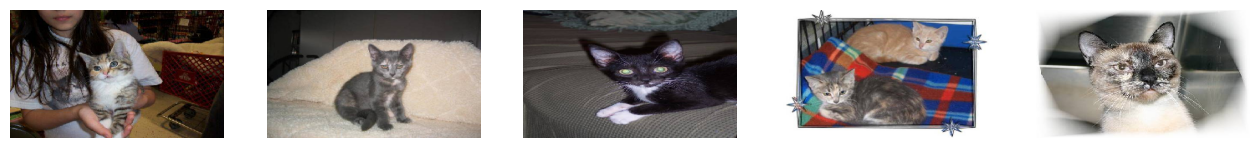

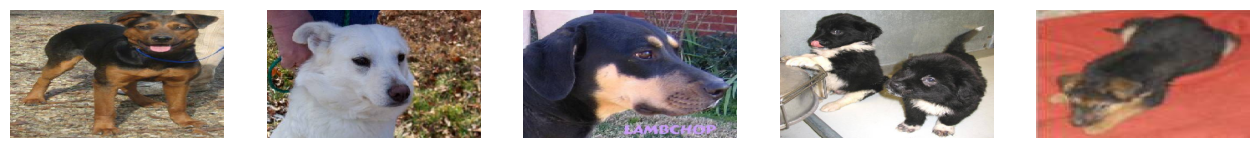

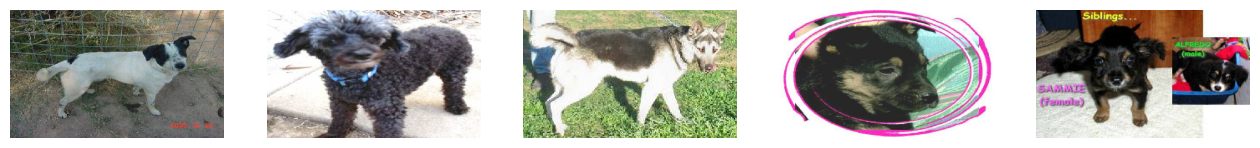

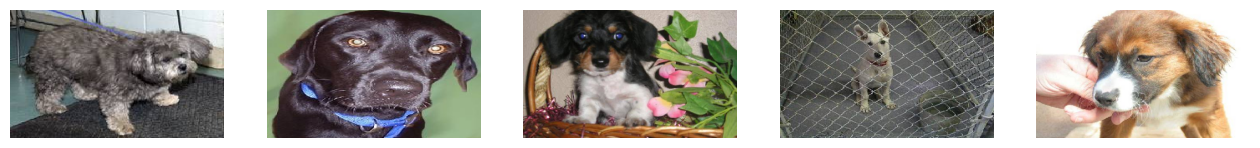

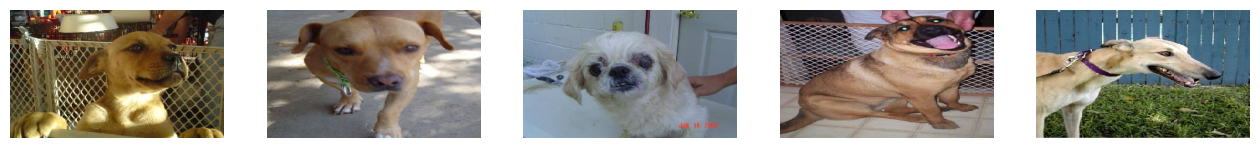

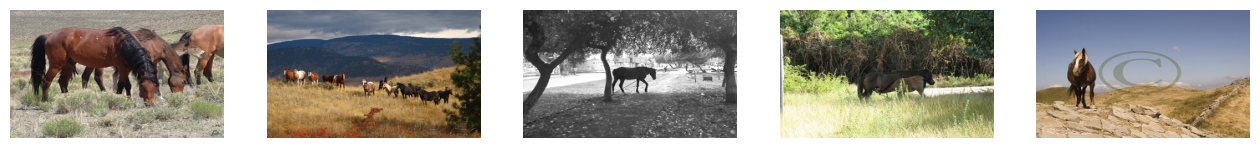

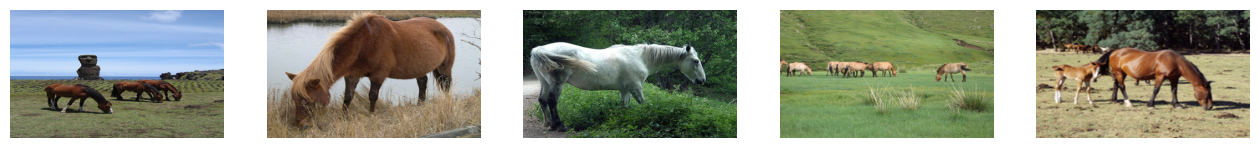

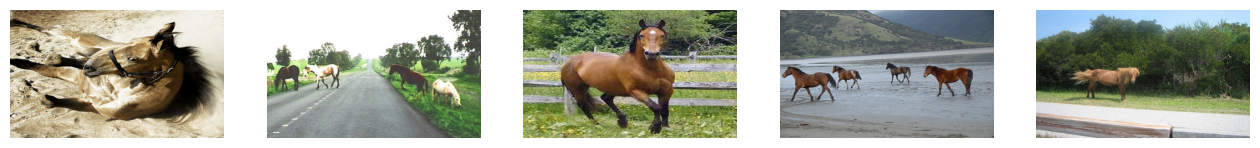

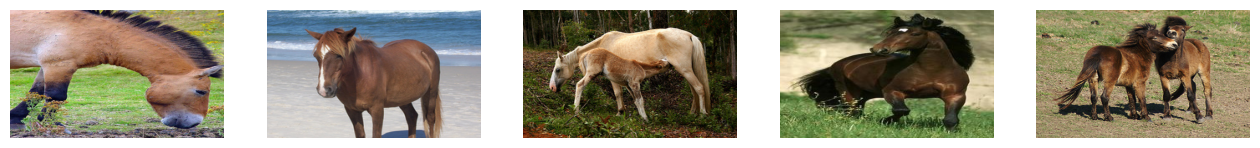

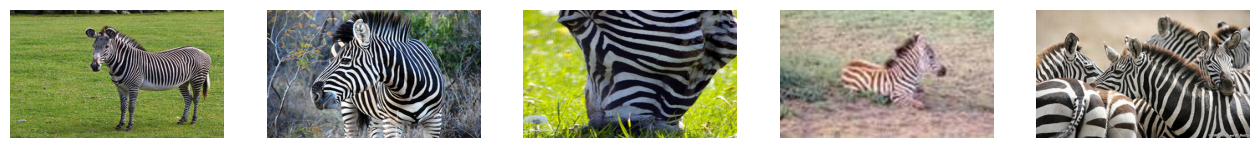

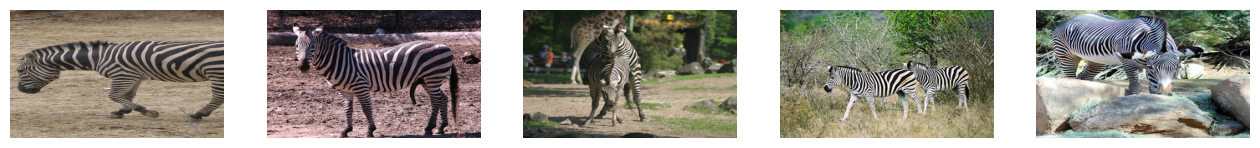

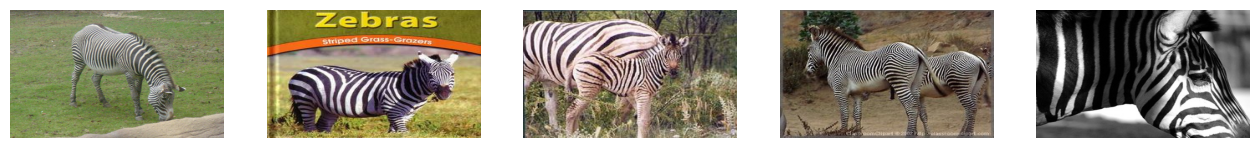

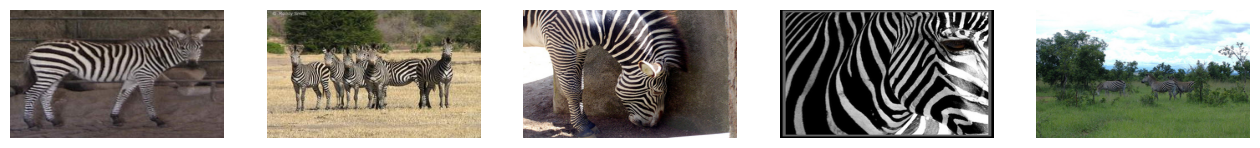

In [49]:
################################################################################################################################
# finnaly plot the images of all unssen dataset animals
################################################################################################################################
for i in range((NewData.n//NewData.batch_size)):
    plt.figure(figsize=(16,60))
    img, label = next(NewData)
    for j in range(5):
        if ((i == 0) & (j==3)):
            
            plt.title('New Pet Pictures Used For Evaluating The Pet Classifier',\
                      fontsize=23,va='bottom',color='#119911',fontweight='bold') 
            
        plt.subplot2grid((16,5),(i,j),1,1)
        plt.imshow(img[j], aspect=.6) 
        plt.axis('off')
    plt.show()